In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import os

In [ ]:
categories = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

# Conexão com Google  Drive

In [ ]:
# Conectando com drive google
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho = '/content/drive/MyDrive/TumorCerebral.zip'
zip = zipfile.ZipFile(file=caminho, mode = 'r')
zip.extractall('./')
zip.close()

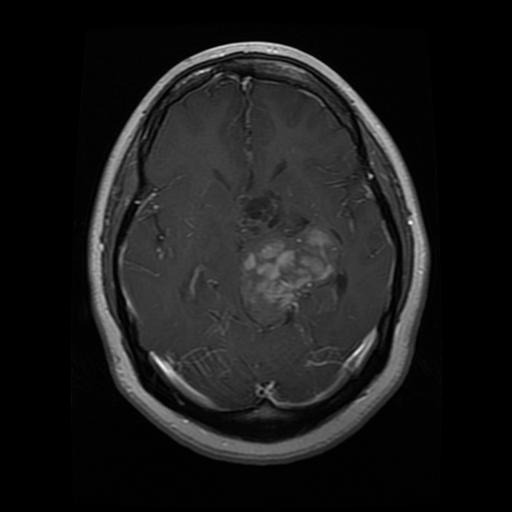

In [ ]:
tf.keras.preprocessing.image.load_img('/content/Training/glioma_tumor/gg (1).jpg')

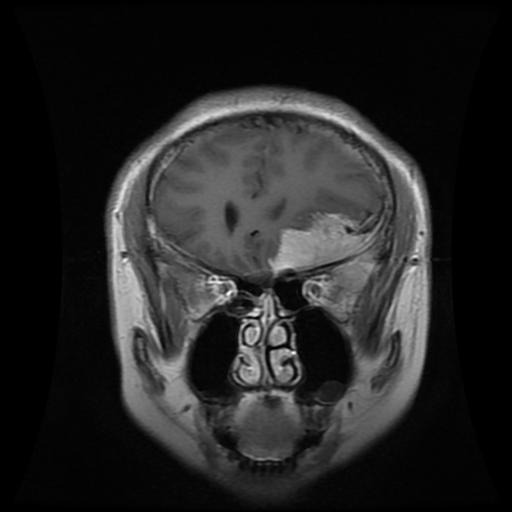

In [ ]:
tf.keras.preprocessing.image.load_img('/content/Training/meningioma_tumor/m (10).jpg')

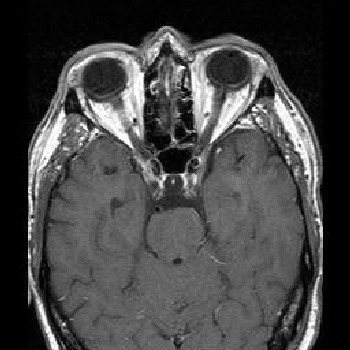

In [ ]:
tf.keras.preprocessing.image.load_img('/content/Training/no_tumor/1.jpg')

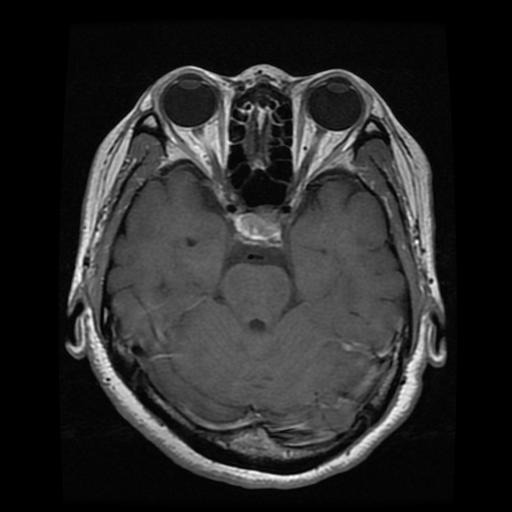

In [ ]:
tf.keras.preprocessing.image.load_img('/content/Training/pituitary_tumor/p (1).jpg')

http://devfuria.com.br/python/os/

In [ ]:
glimoa_train = os.listdir('/content/Training/glioma_tumor')
meningioma_train = os.listdir('/content/Training/meningioma_tumor')
no_tumor_train = os.listdir('/content/Training/no_tumor')
pituitory_train = os.listdir('/content/Training/pituitary_tumor')

list_treino = [glimoa_train, meningioma_train,no_tumor_train, pituitory_train]

dict = {}
for i in range(len(list_treino)):
  dict[categories[i]] = len(list_treino[i])

In [ ]:
fig = px.pie(names=dict.keys(),values=dict.values(),title='Dados de Treino')
fig.update_layout({'title':{"x":0.1}})
fig.show()

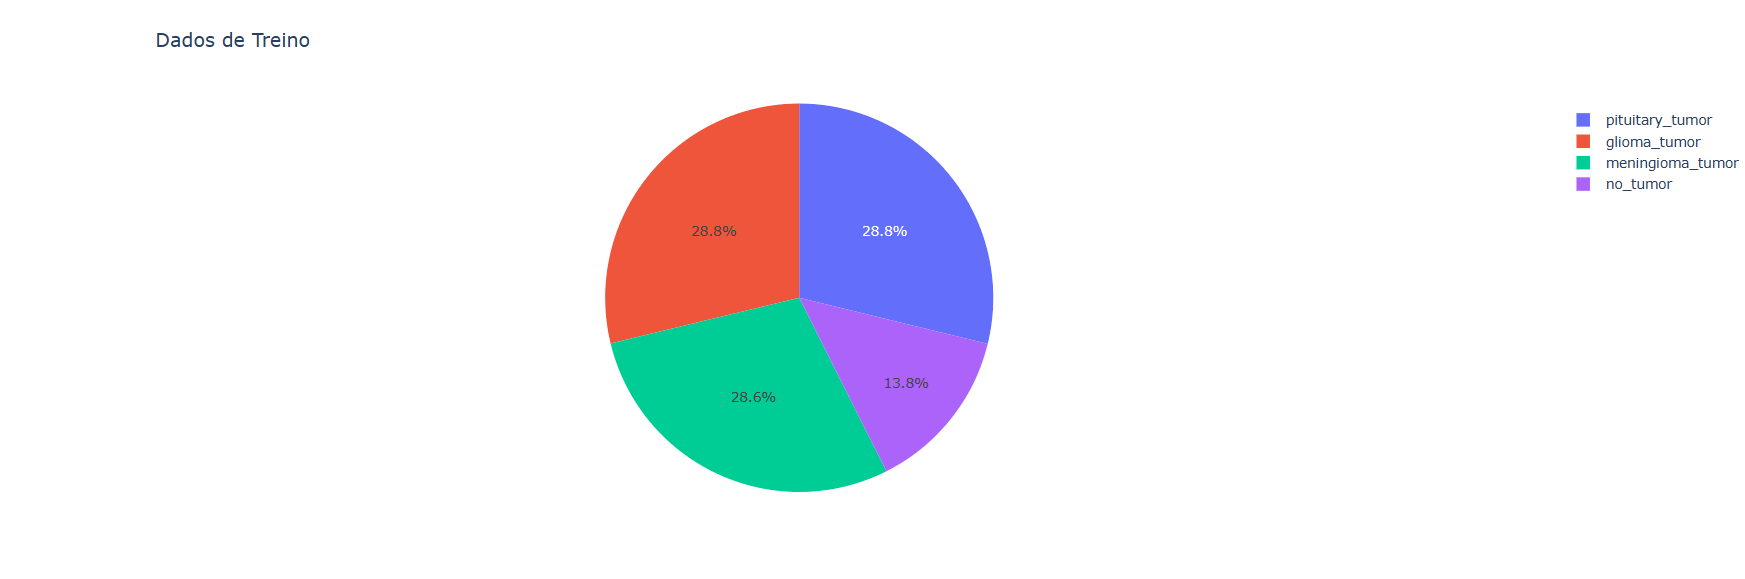

# Base de Dados de Treino

In [ ]:
gerador_treinamento = ImageDataGenerator(rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

In [ ]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/Training',
                                                        target_size = (150, 150),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 2870 images belonging to 4 classes.


In [ ]:
dataset_treinamento.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
dataset_treinamento.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# Base de dados de teste

In [ ]:
gerador_teste = ImageDataGenerator()

In [ ]:
dataset_teste= gerador_teste.flow_from_directory('/content/Testing',
                                                        target_size = (150, 150),
                                                        batch_size = 1,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 394 images belonging to 4 classes.


# Construindo a Rede Neural e Treinando

In [ ]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 4, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 32)      

In [ ]:
network.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
historico = network.fit(dataset_treinamento, epochs=50)

Epoch 1/50
359/359 [==============================] - 129s 354ms/step - loss: 2.1092 - accuracy: 0.4641
Epoch 2/50
359/359 [==============================] - 129s 359ms/step - loss: 1.0090 - accuracy: 0.5544
Epoch 3/50
359/359 [==============================] - 129s 358ms/step - loss: 0.8459 - accuracy: 0.6387
Epoch 4/50
359/359 [==============================] - 134s 374ms/step - loss: 0.7543 - accuracy: 0.6645
Epoch 5/50
359/359 [==============================] - 132s 367ms/step - loss: 0.7000 - accuracy: 0.7157
Epoch 6/50
359/359 [==============================] - 128s 356ms/step - loss: 0.6305 - accuracy: 0.7317
Epoch 7/50
359/359 [==============================] - 133s 371ms/step - loss: 0.5625 - accuracy: 0.7679
Epoch 8/50
359/359 [==============================] - 130s 363ms/step - loss: 0.5429 - accuracy: 0.7711
Epoch 9/50
359/359 [==============================] - 133s 370ms/step - loss: 0.4615 - accuracy: 0.8066
Epoch 10/50
359/359 [==============================] - 130s 363m

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

394/394 [==============================] - 6s 16ms/step


array([[2.7216782e-07, 9.2768185e-02, 9.0723151e-01, 1.5971597e-07],
       [1.0792668e-15, 5.4187376e-07, 9.9999940e-01, 2.3076105e-13],
       [1.7773528e-02, 9.0259480e-01, 7.2342291e-02, 7.2892648e-03],
       ...,
       [4.3700386e-18, 3.1786314e-14, 1.8041475e-22, 1.0000000e+00],
       [3.4747649e-07, 5.4759701e-04, 8.3156380e-09, 9.9945205e-01],
       [3.5447091e-17, 2.2180938e-11, 3.2198529e-20, 1.0000000e+00]],
      dtype=float32)

In [ ]:
previsoes.shape

(394, 4)

In [ ]:
# previsão
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 3, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
# Valores Reais
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

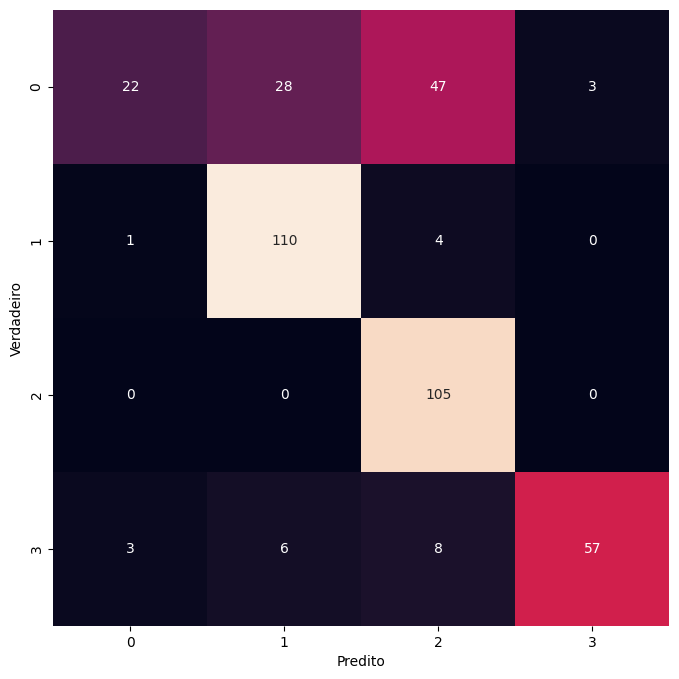

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
plt.figure(figsize=(12,8))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.85      0.22      0.35       100
           1       0.76      0.96      0.85       115
           2       0.64      1.00      0.78       105
           3       0.95      0.77      0.85        74

    accuracy                           0.75       394
   macro avg       0.80      0.74      0.71       394
weighted avg       0.79      0.75      0.70       394

